In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

In [2]:
class GradientBoostingRegressor:
    def __init__(self,n_regs,learning_rate=0.1):
        self.n_regs = n_regs
        self.learning_rate = learning_rate
        self.regs=[]
        self.initial_pred=None

    def fit(self,X,y):
        self.initial_pred = np.mean(y)
        n_samples= X.shape[0]
        pred = np.full(n_samples,self.initial_pred)

        for _ in range(self.n_regs):
            residuals = y - pred
            
            reg = DecisionTreeRegressor(max_depth=3)
            reg.fit(X,residuals)
            self.regs.append(reg)

            pred += self.learning_rate*reg.predict(X)

    def predict(self,X):
        pred = np.full(X.shape[0],self.initial_pred)

        for regr in self.regs:
            pred += self.learning_rate*regr.predict(X)

        return pred

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def run_gradient_bossting(X,y,n_estimators,learning_rate=0.1):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

    gbr = GradientBoostingRegressor(n_regs=n_estimators,learning_rate=learning_rate)
    gbr.fit(X_train,y_train)

    prediction = gbr.predict(X_test)

    mse = mean_squared_error(prediction,y_test)
    return gbr,mse

In [4]:
# from sklearn.datasets import make_regression
# X,y = make_regression(n_samples=1000, n_features=1, noise=0.9, random_state=42)
np.random.seed(42)
X = 2 * np.random.rand(100, 1) - 1  
y = 10 * X[:, 0]**3 - 5 * X[:, 0]**2 + X[:, 0] * 2 + np.random.randn(100) * 0.7  
X = X.reshape(-1, 1)
gbr=run_gradient_bossting(X,y,n_estimators=100,learning_rate=0.1)

Mean Squared Error :  0.5534202987539685


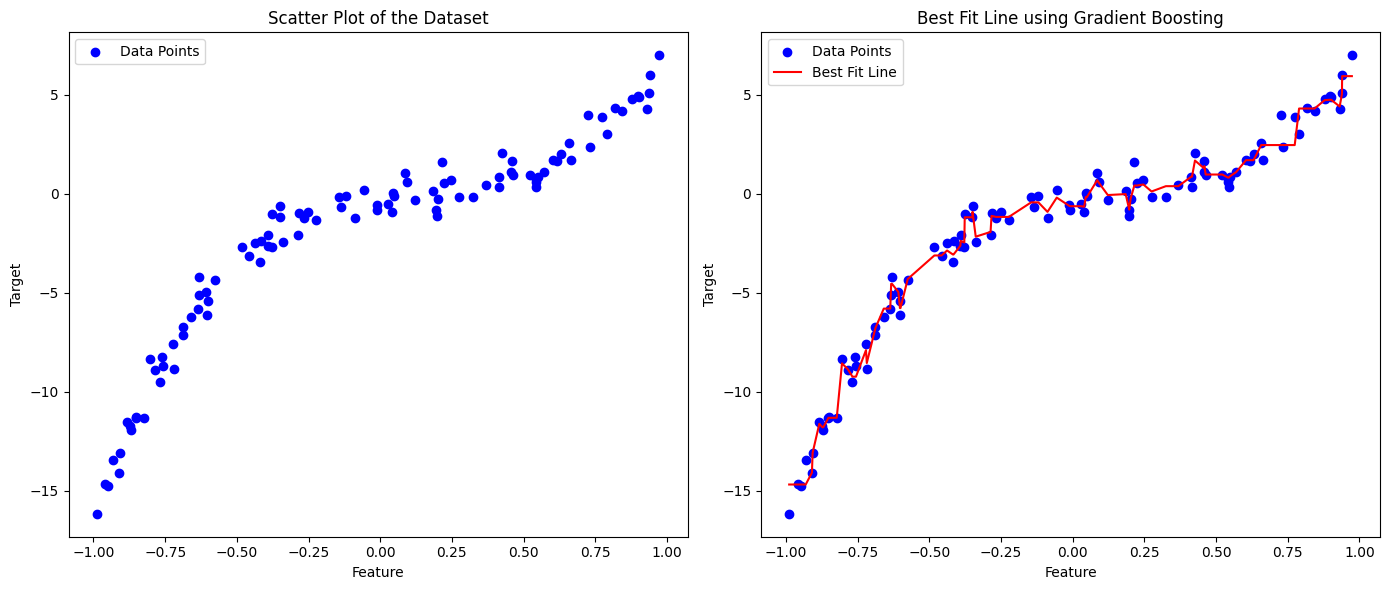

In [5]:
print('Mean Squared Error : ',gbr[1])
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label='Data Points')
plt.title("Scatter Plot of the Dataset")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()

X_sorted = np.sort(X, axis=0)
y_pred_line = gbr[0].predict(X_sorted)

plt.subplot(1, 2, 2)
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_sorted, y_pred_line, color='red', label='Best Fit Line')
plt.title("Best Fit Line using Gradient Boosting")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()

plt.tight_layout()
plt.show()